In [2]:
import json

#open file and load the json data
file = 'C:/Users/karen/Downloads/UIC/IDS-566-master/assignment1/shutdown_1.json'
f = open(file,'r')
json_file = f.read()
shutdown = json.loads(json_file)

#print(json.dumps(shutdown)

In [3]:
#print(shutdown[0])

In [4]:
shutdown[1].keys()

dict_keys(['truncated', 'text', 'retweeted', 'source', 'user', 'in_reply_to_status_id_str', 'created_at', 'lang', 'geo', 'is_quote_status', 'entities', 'favorited', 'id_str', 'retweet_count', 'in_reply_to_status_id', 'favorite_count', 'in_reply_to_user_id_str', 'retweeted_status', 'in_reply_to_user_id', 'id', 'place', 'coordinates', 'in_reply_to_screen_name', 'contributors', 'metadata'])

In [5]:
#retweeted = shutdown[0]['retweeted_status']
#retweeted

## Extract the text field

In [6]:
text_list = []
for line in shutdown:
    text = line['text']
    text_list.append(text)
len(text_list)
text_list[:5]   

['RT @FoxNews: .@SebGorka: "@TheDemocrats say illegal immigrants are the priority over Americans and that\'s just shameful." #shutdown https:/…',
 "RT @FoxNews: BREAKING NEWS: #Shutdown enters third day as @SenateMajLdr calls for bipartisan compromise: 'Step back from the brink'\nhttps:/…",
 'Dear republicans/Trump supporters: Enough with the "democrats don\'t care about the military" BS. Compare our milita… https://t.co/aFH3xmaR77',
 'RT @TheDailyEdge: Trump allowed the government to #shutdown to distract from the news he had unprotected sex with a porn star while Melania…',
 'RT @peterdaou: Summing up the #shutdown in ten words:\n\nDemocratic lawmakers want to protect children.\nRepublican lawmakers do not.\n\n#CHIP #…']

## check keys in the dictionary 

In [7]:
shutdown[0].keys()

dict_keys(['truncated', 'text', 'retweeted', 'source', 'user', 'in_reply_to_status_id_str', 'created_at', 'lang', 'geo', 'is_quote_status', 'entities', 'favorited', 'id_str', 'retweet_count', 'in_reply_to_status_id', 'favorite_count', 'in_reply_to_user_id_str', 'retweeted_status', 'in_reply_to_user_id', 'id', 'place', 'coordinates', 'in_reply_to_screen_name', 'contributors', 'metadata'])

## Extract the retweet_names fied

In [8]:
tweet = []
for line in shutdown:
    #line is a dict, containing key'retweeted_status'
    for key in line.keys(): 
        if key == 'retweeted_status':
            tweet.append(line[key]['user']['screen_name'])

#double check the retweet names
tweet[:9]            

   

['FoxNews',
 'FoxNews',
 'TheDailyEdge',
 'peterdaou',
 'FoxNews',
 'FoxNews',
 'FoxNews',
 'TheDailyEdge',
 'FoxNews']

## count the frequency of each term

In [9]:
#count the term
count_word = {}
for name in tweet:
    if name in count_word.keys():
        count_word[name] += 1
    else:
        count_word[name] = 1

word_frequency = list(count_word.values())

## Find the most popular terms mentioned

In [10]:
import pandas as pd
word_count = pd.Series(word_frequency,index = count_word.keys())
word_count.describe()

count     255.000000
mean       17.239216
std       120.619471
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      1754.000000
dtype: float64

In [11]:
word_count.argmax()

'FoxNews'

Most popular top 5 terms

In [12]:
word_count.sort_values(ascending = False).head(5)

FoxNews         1754
SenDougJones     572
peterdaou        547
TheDailyEdge     153
BanditRandom     137
dtype: int64

# text_list

In [13]:
# preview text_list
print(text_list[:10])

['RT @FoxNews: .@SebGorka: "@TheDemocrats say illegal immigrants are the priority over Americans and that\'s just shameful." #shutdown https:/…', "RT @FoxNews: BREAKING NEWS: #Shutdown enters third day as @SenateMajLdr calls for bipartisan compromise: 'Step back from the brink'\nhttps:/…", 'Dear republicans/Trump supporters: Enough with the "democrats don\'t care about the military" BS. Compare our milita… https://t.co/aFH3xmaR77', 'RT @TheDailyEdge: Trump allowed the government to #shutdown to distract from the news he had unprotected sex with a porn star while Melania…', 'RT @peterdaou: Summing up the #shutdown in ten words:\n\nDemocratic lawmakers want to protect children.\nRepublican lawmakers do not.\n\n#CHIP #…', "RT @FoxNews: BREAKING NEWS: #Shutdown enters third day as @SenateMajLdr calls for bipartisan compromise: 'Step back from the brink'\nhttps:/…", 'RT @FoxNews: .@SebGorka: "@TheDemocrats say illegal immigrants are the priority over Americans and that\'s just shameful." #s

# Find out non duplicated text tweets

In [14]:
text_series=pd.Series(text_list)
new_text = text_series.drop_duplicates()
print(new_text.shape)

(919,)


There are 919 text line in total that are not duplicates

##remove url

In [15]:
import re
url = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
no_url = []
for text in new_text :
    without_url = re.sub(url,"",text)
    no_url.append(without_url)

no_url = pd.Series(no_url)
#double check url
#print(no_url.values)

## changing '#' sign to 'hashtag_'

In [17]:
regexp_hashtag = r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)'
pattern_hashtag = re.compile(regexp_hashtag, re.UNICODE | re.IGNORECASE)

no_signs = []
for text in no_url.values:
    new_text = pattern_hashtag.sub(r'hashtag_\1', text)

    no_signs.append(new_text)
#no_signs


#there are still # signs,url in the text for some reasons
#no_signs = pd.Series(no_signs)
#for line in no_signs:
    #for char in line:
        #if char == '#':
            #char.replace('#','hashtag_')

#no_signs


## remove mentions

In [17]:
regexp_mention = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)'
pattern_mention = re.compile(regexp_mention, re.UNICODE | re.IGNORECASE)
no_mentions = []
for line in no_signs:
    without_mentions= pattern_mention.sub('', line)
    no_mentions.append(without_mentions)

#preview final text without url, mentions with hashtag_ replaced
No_Mention = pd.Series(no_mentions)
print(No_Mention)

0      RT : .@SebGorka: " say illegal immigrants are ...
1      RT : BREAKING NEWS: hashtag_Shutdown enters th...
2      Dear republicans/Trump supporters: Enough with...
3      RT : Trump allowed the government to hashtag_s...
4      RT : Summing up the hashtag_shutdown in ten wo...
5      RT : Moments ago,  spoke on the Senate floor a...
6      RT : Moments ago  pledged to address immigrati...
7       hashtag_bullshit 2/3\n1/19/18 Democratic Sena...
8      RT : Around the world and here at home, our mi...
9      RT : GOP are using an unseen hashtag_memo, an ...
10     Definition of Government hashtag_Shutdown: \nW...
11     RT : .@JesseBWatters: "Apparently Democrats ha...
12     RT : .@JesseBWatters: "Apparently Democrats ha...
13     RT : Just another day in the White House...\n\...
14     RT :  gives his prediction on the hashtag_shut...
15     RT : The 2018 government hashtag_shutdown was ...
16     aaaah, no agreement! !!!my heart goes out to t...
17     RT : On ,  gave his pred

## Binary Vectorization

In [18]:
#create binary vectorization to count frequency of terms
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
import numpy as np
Data = np.array(No_Mention)
binary_vector = CountVectorizer(binary = True)
word = binary_vector.fit_transform(Data)
print(word.toarray())
#word = binary_vector.fit(Data)
#word = binary_vector.transform(Data)
#print(word)
word.shape

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


(919, 3069)

## Extract hashtags from the data 

Top 5 hashtags 

In [19]:
#by building the tokenization, we count the frequency of each tokens, as the index
token =pd.Series(binary_vector.get_feature_names())
frequency = np.ravel(word.sum(axis=0))
tokenization = pd.DataFrame(token,columns=['token'])
tokenization['count'] = pd.Series(frequency)
#tokenization 



In [20]:
#filther hashtag_
filters = tokenization['token'].str.contains('hashtag_')
hashtag = tokenization[filters]
hashtag.sort_values('count',ascending=False).head(5)

,token,count
1421,hashtag_shutdown,712
1470,hashtag_trumpshutdown,62
1462,hashtag_trump,36
1401,hashtag_schumershutdown,31
1423,hashtag_shutdown2018,23


## TF-IDF vectorization

In [21]:
TfIdf = TfidfVectorizer(norm = None)
word_tfidf = TfIdf.fit_transform(Data)
print(word_tfidf.todense())
TfIdf.get_feature_names()

word_tfidf.shape

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


(919, 3069)

Q4: Map document to term matrix to 2D space and plot it using binary
vectorization. Repeat that for count vectorization and TF-IDF vectorization.
Analyze your result.

Dimension (919, 3069) -> (919, 2)


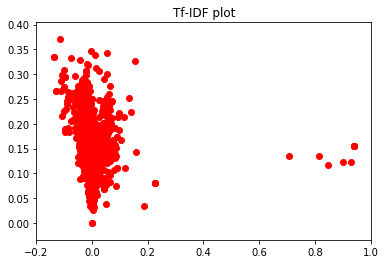

In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from  sklearn.decomposition import TruncatedSVD

#Using TF-IDF vectorization:
TfIdf = TfidfVectorizer(binary = True)
word_tfidf = TfIdf.fit_transform(Data)

#Reduce dimension
lsa = TruncatedSVD(2)
tfidf_2d = lsa.fit_transform(word_tfidf)

print("Dimension %s -> %s" % (word_tfidf.shape, tfidf_2d.shape))

plt.scatter(tfidf_2d[:, 1], tfidf_2d[:, 0],c = 'r')
plt.title('Tf-IDF plot')
plt.show()


The way we find the cluster by using TF-IDF matrix is a good tool to find out the noises in the text analysis,furthere more, this could also be used to detect unusual activities in the application of text analysis

Dimension (919, 3069) -> (919, 2)


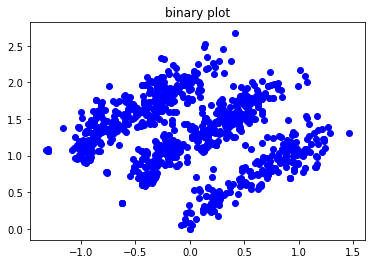

In [23]:
#Using binary vectorization- recall binary_vector and word

#reduce dimension
lsa_binary = TruncatedSVD(2)
binary_vector_2d = lsa_binary.fit_transform(word)

print("Dimension %s -> %s" % (word.shape, binary_vector_2d.shape))
plt.scatter(binary_vector_2d[:, 1], binary_vector_2d[:, 0],c = 'b')
plt.title('binary plot')
plt.show()


By using the binary vector analysis plot gives the information that the tokens we have generated from the model could be separted into 3 clusters and besides these 3 clusters, we could clearly find that there are still some noises in the plot.

Dimension (919, 3069) -> (919, 2)


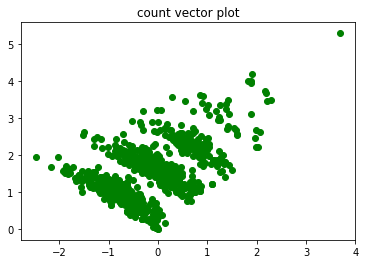

In [24]:
#use count terms vectorization
count_vector = CountVectorizer(binary=False)
wordcount = count_vector.fit_transform(Data)

#reduce dimension
lsa_count = TruncatedSVD(2)
count_vector_2d = lsa_count.fit_transform(wordcount)

print("Dimension %s -> %s" % (wordcount.shape, count_vector_2d.shape))
plt.scatter(count_vector_2d[:, 1], count_vector_2d[:, 0],c = 'g')
plt.title('count vector plot')
plt.show()


By using the countting frequency instead of the binary vector, this separtes them into 3 to 4 clusters with the last clusters containiing noises for most of them. However, it depends on the target we are going to focus.

Q5: Co-occurrence analysis: Find which two hashtags appear together in a same
tweet mostly? Which two are the second most? Analyze your results.
Hint: To measure co-occurrence between to features you can use binary
vectorization and compute the dot product between feature vectors.

In [55]:
#buy using the binary vectorization on hashtag

#creat a filter for filtering hashtag in Terms Matrix

filter_hashtag = []
for terms in list(binary_vector.get_feature_names()):
    if terms.find('hashtag_') != -1:
        filter_hashtag.append(terms)

matrix = pd.DataFrame(word.toarray(),columns=list(binary_vector.get_feature_names()))
hashtag_table = matrix[filter_hashtag]
(np.array(hashtag_table)).shape
hashtag_name = list(hashtag_table)

In [67]:
hashtag_table = np.array(hashtag_table)
#find out co-occurence by using dot product between feature
feature_vector = np.array_split(hashtag_table,1296) #3*423
feature_vector=np.array(feature_vector)

#compute dot product with each feature vector
dp = []
for item_1 in range(424):
    first_feature = feature_vector[item_1]
    for item_2 in range(424):
        second_feature = np.transpose(feature_vector[item_2])
        dot_product = np.dot(first_feature,second_feature)
        if dot_product >1:
            dp.append(dot_product)
            #print(hashtag_name[item_1],hashtag_name[item_2])
            #print(dot_product)
            

    

hashtag_ame hashtag_ame
[[2]]
hashtag_ame hashtag_ancnec
[[2]]
hashtag_ame hashtag_schumershut
[[2]]
hashtag_ancnec hashtag_ame
[[2]]
hashtag_ancnec hashtag_ancnec
[[4]]
hashtag_ancnec hashtag_bread
[[2]]
hashtag_ancnec hashtag_clueless
[[2]]
hashtag_ancnec hashtag_federalreserve
[[2]]
hashtag_ancnec hashtag_libertarian
[[2]]
hashtag_ancnec hashtag_maga
[[2]]
hashtag_ancnec hashtag_schumershut
[[2]]
hashtag_artist hashtag_artist
[[6]]
hashtag_artist hashtag_artistsontwitter
[[2]]
hashtag_artist hashtag_dc
[[2]]
hashtag_artist hashtag_draintheswamp
[[2]]
hashtag_artist hashtag_essential
[[2]]
hashtag_artist hashtag_godhasneverlostcontrol
[[2]]
hashtag_artist hashtag_gop
[[2]]
hashtag_artist hashtag_govgeek
[[2]]
hashtag_artist hashtag_leadership
[[2]]
hashtag_artist hashtag_memo
[[2]]
hashtag_artist hashtag_nyt
[[2]]
hashtag_artist hashtag_research
[[2]]
hashtag_artist hashtag_schumersshutdown
[[2]]
hashtag_artist hashtag_shutdowntrump
[[2]]
hashtag_artist hashtag_sundayfunday
[[2]]
has

[[2]]
hashtag_fail hashtag_gemstone
[[2]]
hashtag_fakenewscnn hashtag_crumbspelosi
[[2]]
hashtag_fakenewscnn hashtag_dacadreamers
[[2]]
hashtag_fakenewscnn hashtag_dollar
[[2]]
hashtag_fakenewscnn hashtag_fakenewscnn
[[3]]
hashtag_fakenewscnn hashtag_jello
[[2]]
hashtag_fakenewscnn hashtag_obama
[[2]]
hashtag_fakenewscnn hashtag_ourtroops
[[2]]
hashtag_fakenewscnn hashtag_research
[[2]]
hashtag_fakenewscnn hashtag_schumer
[[2]]
hashtag_fakenewscnn hashtag_taxreformscam
[[2]]
hashtag_fakenewscnn hashtag_vegan
[[2]]
hashtag_fakenewscnn hashtag_womensmarch2018
[[2]]
hashtag_fakenewscnn hashtag_xmr
[[2]]
hashtag_fakepotus hashtag_cspan2
[[2]]
hashtag_fakepotus hashtag_fakepotus
[[2]]
hashtag_fakepotus hashtag_govgeek
[[2]]
hashtag_fakepotus hashtag_midtermelections
[[2]]
hashtag_fakepotus hashtag_schummershutdown
[[2]]
hashtag_fakepotus hashtag_shutdowntrump
[[2]]
hashtag_falconheavy hashtag_falconheavy
[[3]]
hashtag_fashion hashtag_countryoverparty
[[2]]
hashtag_fashion hashtag_dealornode

hashtag_oilpainting hashtag_taxreformscam
[[2]]
hashtag_ornot hashtag_ornot
[[2]]
hashtag_ourtroops hashtag_crumbspelosi
[[2]]
hashtag_ourtroops hashtag_dacadreamers
[[2]]
hashtag_ourtroops hashtag_dollar
[[2]]
hashtag_ourtroops hashtag_fakenewscnn
[[2]]
hashtag_ourtroops hashtag_jello
[[2]]
hashtag_ourtroops hashtag_obama
[[2]]
hashtag_ourtroops hashtag_ourtroops
[[2]]
hashtag_ourtroops hashtag_research
[[2]]
hashtag_ourtroops hashtag_schumer
[[2]]
hashtag_ourtroops hashtag_taxreformscam
[[2]]
hashtag_ourtroops hashtag_vegan
[[2]]
hashtag_ourtroops hashtag_womensmarch2018
[[2]]
hashtag_ourtroops hashtag_xmr
[[2]]
hashtag_painting hashtag_painting
[[2]]
hashtag_pc hashtag_pc
[[2]]
hashtag_pence hashtag_pence
[[2]]
hashtag_poll hashtag_balancedbudget
[[2]]
hashtag_poll hashtag_clinton
[[3]]
hashtag_poll hashtag_corruptfbi
[[2]]
hashtag_poll hashtag_cryptomining
[[2]]
hashtag_poll hashtag_democrats
[[2]]
hashtag_poll hashtag_dontpanic
[[2]]
hashtag_poll hashtag_furlough
[[2]]
hashtag_pol

hashtag_tombrady hashtag_poll
[[2]]
hashtag_tombrady hashtag_randpaul
[[2]]
hashtag_tombrady hashtag_resistance
[[2]]
hashtag_tombrady hashtag_schumerhatesamerica
[[2]]
hashtag_tombrady hashtag_schumershutdown
[[2]]
hashtag_tombrady hashtag_sciencestops
[[2]]
hashtag_tombrady hashtag_speakout
[[2]]
hashtag_tombrady hashtag_sun
[[2]]
hashtag_tombrady hashtag_taxationistheft
[[2]]
hashtag_tombrady hashtag_taxreformscam
[[2]]
hashtag_tombrady hashtag_tombrady
[[3]]
hashtag_tombrady hashtag_trumpshudown
[[2]]
hashtag_tombrady hashtag_updates
[[2]]
hashtag_tombrady hashtag_vegan
[[2]]
hashtag_tombrady hashtag_veganarishow
[[2]]
hashtag_tombrady hashtag_vikings
[[2]]
hashtag_tombrady hashtag_washington
[[2]]
hashtag_trumpcrimefa hashtag_trumpcrimefa
[[2]]
hashtag_trumpcrimefa hashtag_trumpshu
[[2]]
hashtag_trumpshu hashtag_trumpcrimefa
[[2]]
hashtag_trumpshu hashtag_trumpshu
[[2]]
hashtag_trumpshudown hashtag_artist
[[2]]
hashtag_trumpshudown hashtag_artistsontwitter
[[2]]
hashtag_trumpshudo

11

top second 2 hashtag: trumpshutdown, shutdown
top first 2 hashata: happened in 11 text -->vegan

## Conclusion from my analysis
According to the analysis on the tweets, we have found that the most popular hashtag is #shutdown, including #trumpshutdown in the tweets. Although it cannot be concluded that people on twitter has attitude on any sides, the shut down of the government of Trump is popular on Twitter after one year since Trump became president of United States.